In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import models, layers, regularizers
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow.keras.callbacks import EarlyStopping
encoder = LabelEncoder()
scaler = StandardScaler()


In [64]:
# Reading the CSV file
dataframe = pd.read_csv("/content/features_3_sec.csv")

# Displaying the first few rows
display(dataframe.head())


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [65]:
dataframe.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [66]:
# Depicting the dimensions
dataframe.shape

(9990, 60)

In [67]:
# Displaying information on the dataframe including the number of samples, features, and their data types
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [68]:
# Counting missing values in each column of 'dataframe'
dataframe.isnull().sum()


filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

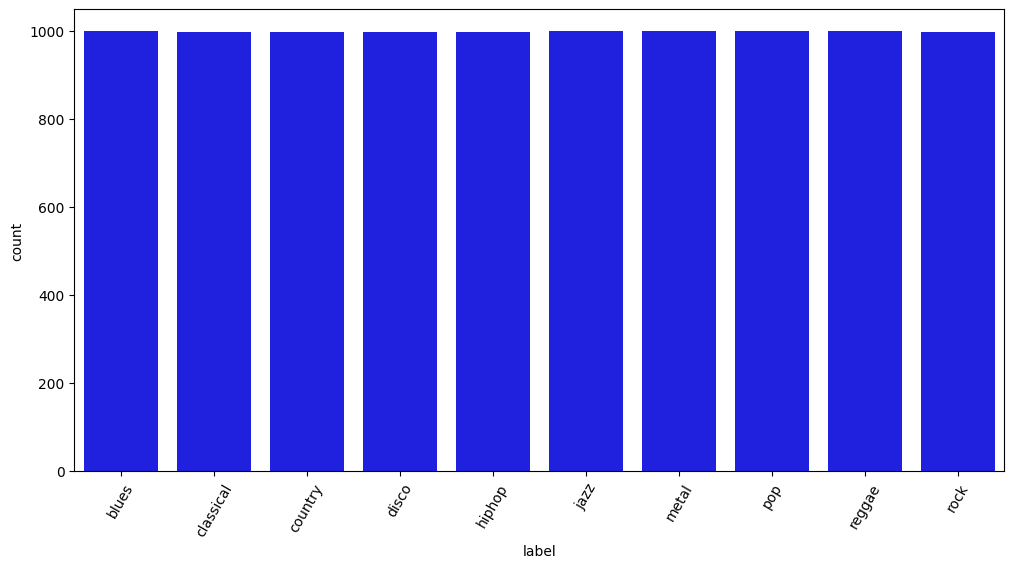

In [95]:
plt.figure(figsize=(12, 6))

# Plotting the distribution of each category with all bars in blue
sns.countplot(x='label', data=dataframe, color='blue')


# Rotating the x-axis labels for better readability
plt.xticks(rotation=60)
plt.show()


In [70]:
# Removing the 'filename' column from 'dataframe' and displaying the top rows
dataframe = dataframe.drop(labels='filename', axis=1)
dataframe.head()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [71]:
# Selecting all columns except the last one from 'dataframe'
data = dataframe.iloc[:, :-1]
data


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [72]:
# Extracting the last column as 'labels' from 'dataframe' and converting it to a DataFrame
labels = dataframe.iloc[:, -1]
labels.to_frame()


,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


In [73]:
# Converting 'data' to a numpy array of type float
x = np.array(data, dtype=float)

# Initializing scaler and encoder
scaler = StandardScaler()
encoder = LabelEncoder()

# Fitting and transforming 'data' with scaler
x = scaler.fit_transform(data)

# Fitting and transforming 'labels' with encoder
y = encoder.fit_transform(labels)

# Displaying the shapes of 'x' and 'y'
x.shape, y.shape

((9990, 58), (9990,))

In [74]:
# Performing the split with a test size of 33%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

# Displaying the shapes of the training and testing data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6693, 58), (3297, 58), (6693,), (3297,))

In [76]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


RFC_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fiting the model on the training data
RFC_model.fit(x_train, y_train)

# Initiating Prediction on the test data
y_pred = RFC_model.predict(x_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Performing cross-validation inorder to assess model stability
cv_scores = cross_val_score(RFC_model, x, y, cv=5)

# Print evaluation results
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\n")




Accuracy: 0.8571428571428571
Precision: 0.8572001243506782
Recall: 0.8576325875124603
F1 Score: 0.8559601851531531



In [52]:
# Defining the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] # Method for sampling data points
}

# Instantiating the GridSearchCV
grid_search = GridSearchCV(estimator=RFC_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fiting the grid search to the data
grid_search.fit(x_train, y_train)

# Printing the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Using the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(x_test)

# Recalculating the metrics with the optimized model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Printing the improved metrics
print(f"\nImproved Accuracy: {accuracy}")
print(f"Improved Precision: {precision}")
print(f"Improved Recall: {recall}")
print(f"Improved F1 Score: {f1}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8706101088311895

Improved Accuracy: 0.8877767667576585
Improved Precision: 0.8873550387614333
Improved Recall: 0.8881497649995488
Improved F1 Score: 0.8869797483510309


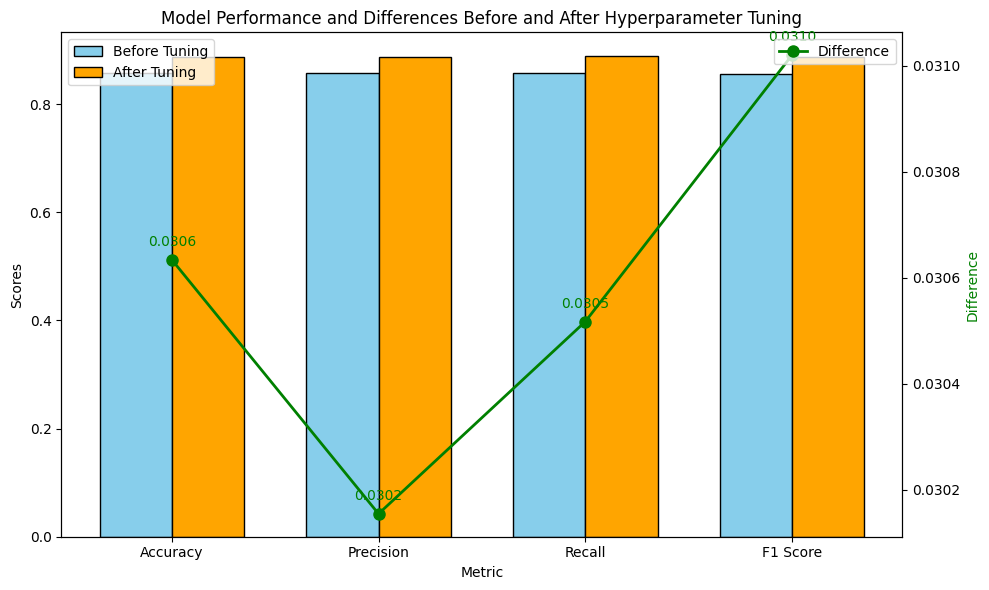

In [77]:
# Metrics and their scores before and after tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_before = np.array([0.8571428571428571, 0.8572001243506782, 0.8576325875124603, 0.8559601851531531])
scores_after = np.array([0.8877767667576585, 0.8873550387614333, 0.8881497649995488, 0.8869797483510309])
differences = scores_after - scores_before


fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for scores before and after tuning
indices = np.arange(len(metrics))  # the x locations for the groups
width = 0.35  # the width of the bars

bars1 = ax1.bar(indices - width/2, scores_before, width, label='Before Tuning', color='skyblue', edgecolor='black')
bars2 = ax1.bar(indices + width/2, scores_after, width, label='After Tuning', color='orange', edgecolor='black')

# Line plot for differences
ax2 = ax1.twinx()
line = ax2.plot(indices, differences, color='green', label='Difference', marker='o', markersize=8, linestyle='-', linewidth=2)

# Labels, titles, and layout
ax1.set_xlabel('Metric')
ax1.set_ylabel('Scores')
ax2.set_ylabel('Difference', color='green')
ax1.set_xticks(indices)
ax1.set_xticklabels(metrics)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


for i, diff in enumerate(differences):
    ax2.annotate(f'{diff:.4f}', (indices[i], differences[i]), textcoords="offset points", xytext=(0,10), ha='center', color='green')

plt.title('Model Performance and Differences Before and After Hyperparameter Tuning')
plt.tight_layout()
plt.show()


In [83]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Instantiating the XGBClassifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fiting the model on the training data
xgb_model.fit(x_train, y_train)

# Implementing prediction on the test data
y_pred = xgb_model.predict(x_test)

# Calculating and printing evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8932362754018806
Precision: 0.8934990005949899
Recall: 0.8937220039659785
F1 Score: 0.8930229775741804


In [84]:
# Defining a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of gradient boosted trees. Equivalent to number of boosting rounds.
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting. Range is [0,1]
    'max_depth': [3, 4, 5],  # Maximum tree depth for base learners.
    'subsample': [0.5, 0.7, 1.0],  # Subsample ratio of the training instances.
    'colsample_bytree': [0.5, 0.7, 1.0],  # Subsample ratio of columns when constructing each tree.
}

# Initializing the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fiting GridSearchCV
grid_search.fit(x_train, y_train)

# Printing Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Estimators to make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test)

# Recalculating the metrics with the tuned model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Printing the improved evaluation metrics
print("\nAfter Hyperparameter Tuning:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.8831630369137444

After Hyperparameter Tuning:
Accuracy: 0.9029420685471641
Precision: 0.9027911312808051
Recall: 0.9033316003849354
F1 Score: 0.9028164834819041


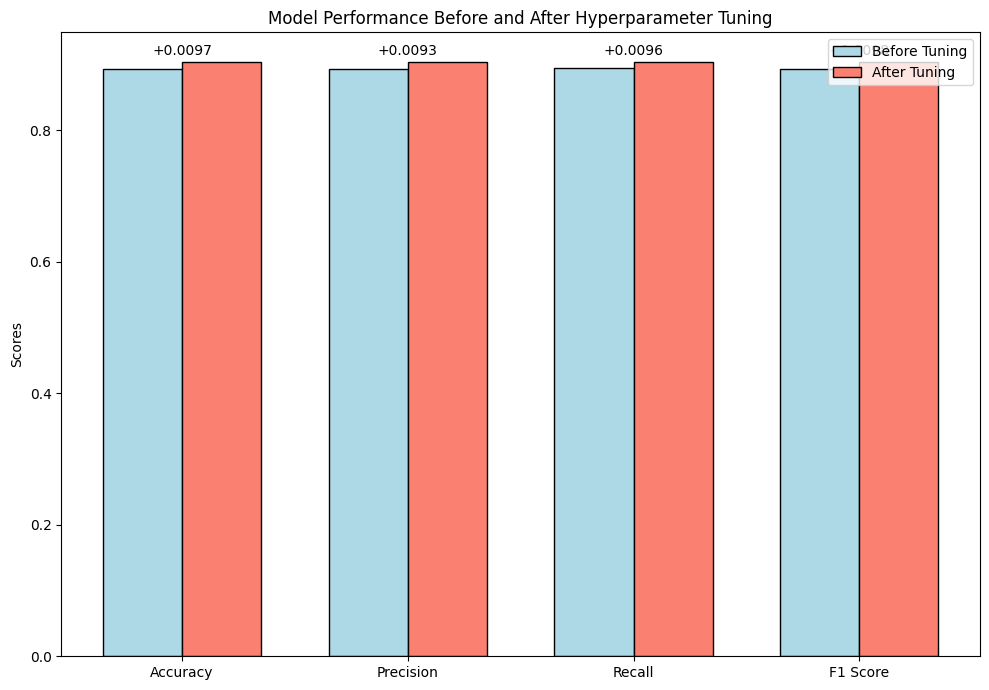

In [86]:
# Metrics and their scores before and after tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_before = np.array([0.8932362754018806, 0.8934990005949899, 0.8937220039659785, 0.8930229775741804])
scores_after = np.array([0.9029420685471641, 0.9027911312808051, 0.9033316003849354, 0.9028164834819041])
differences = scores_after - scores_before

# Ploting setup
fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot for scores before and after tuning
indices = np.arange(len(metrics))  # the x locations for the groups
width = 0.35  # the width of the bars

bars_before = ax.bar(indices - width/2, scores_before, width, label='Before Tuning', color='lightblue', edgecolor='black')
bars_after = ax.bar(indices + width/2, scores_after, width, label='After Tuning', color='salmon', edgecolor='black')


ax.set_ylabel('Scores')
ax.set_title('Model Performance Before and After Hyperparameter Tuning')
ax.set_xticks(indices)
ax.set_xticklabels(metrics)
ax.legend()


for index in indices:
    height = max(scores_before[index], scores_after[index])
    ax.annotate(f'+{differences[index]:.4f}',
                xy=(index, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
